In [9]:
import numpy as np
import matplotlib.pyplot as plt
import algos as al
import func

rng = np.random.default_rng(424)

### Ackley function

$f(x,y) = -A \exp{\left( -B \sqrt{\cfrac{x^2 + y^2}{2}} \right)} - \exp{\left( \cfrac{\cos{Cx} + \cos{Cy}}{2} \right)}$, $\quad\argmin f(x,y) = (0, 0)$

https://www.sfu.ca/~ssurjano/ackley.html


### Griewank function

$f(x,y) = \cfrac{x^2 + y^2}{A} - \cos{x} * \cos{\cfrac{y}{\sqrt2}}$, $\quad\argmin f(x,y) = (0, 0)$

https://www.sfu.ca/~ssurjano/griewank.html


### Rosenbrock function

$f(x,y) = A (y - x^2)^2 + (x - 1)^2$, $\quad\argmin f(x,y) = (1, 1)$

https://www.sfu.ca/~ssurjano/rosen.html


### Schwefel function

$f(x,y) = -x \sin{\sqrt{|x|}} - y \sin{\sqrt{|y|}}$, $\quad\argmin f(x,y) = (420.9687, 420.9687)$

https://www.sfu.ca/~ssurjano/schwef.html

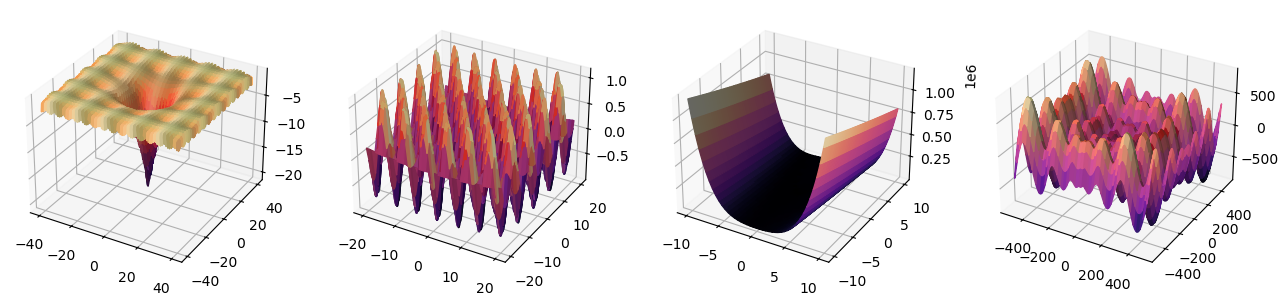

In [10]:
fig, axes = plt.subplots(ncols=4, subplot_kw=dict(projection="3d"))
fig.set_figwidth(16)

ackley = func.ackley()
rosenbrock = func.rosenbrock()
griewank = func.griewank()
schwefel = func.schwefel()

ackley.plot(axes[0], 256)
griewank.plot(axes[1], 256)
rosenbrock.plot(axes[2], 256)
schwefel.plot(axes[3], 256)

In [11]:
def benchmark(func, algos, legend, n_iters=100, eval_calls_lim=1000, title=None):
    fig, axes = plt.subplots()
    lines = []

    for algo in algos:
        anchors = []

        for i in range(n_iters):
            for minima in algo(func, eval_calls_lim):
                anchors.append((func.eval_calls, minima.value))

        anchors.sort(key=lambda x: x[0])
        x = []
        y = []
        i = 0
        while i < len(anchors):
            if i == 0 or anchors[i][0] != x[-1]:
                x.append(anchors[i][0])

                value_sum = 0
                j = i + 1
                while j < len(anchors) and anchors[j][0] == x[-1]:
                    value_sum += anchors[j][1]
                    j += 1

                y.append(value_sum / (j - i))
                i = j

        lines.append(axes.plot(x, y)[0])

    axes.legend(tuple(lines), tuple(legend), loc="upper right")

    axes.set_xlabel("eval_calls")
    axes.set_ylabel("found_min")
    axes.set_title(title)
    axes.grid()
    fig.savefig(f"benchmarks/{title}.png", dpi=400)

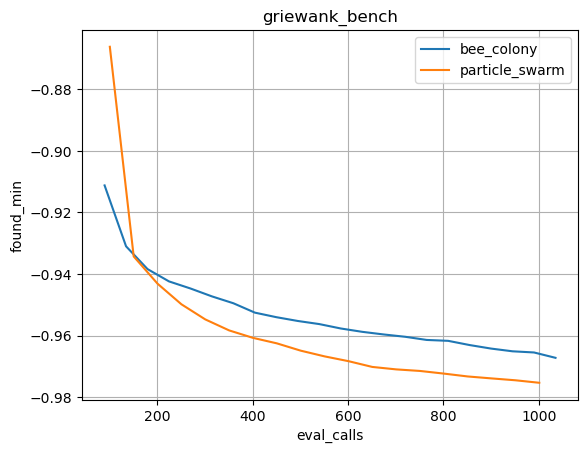

In [17]:
benchmark(
    griewank,
    [al.bee_colony_bench, al.particle_swarm_bench],
    ["bee_colony", "particle_swarm"],
    title="griewank_bench",
)